In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Disease%20Symptom%20Prediction/dataset.csv")
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(['Symptom_8','Symptom_9','Symptom_10','Symptom_11','Symptom_12','Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17'],axis=1,inplace=True)

In [5]:
df.shape

(4920, 8)

In [7]:
df.isna().sum()

Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
dtype: int64

In [8]:
(df.isnull().sum()/df.shape[0])*100

Disease       0.000000
Symptom_1     0.000000
Symptom_2     0.000000
Symptom_3     0.000000
Symptom_4     7.073171
Symptom_5    24.512195
Symptom_6    40.365854
Symptom_7    53.902439
dtype: float64

<AxesSubplot:>

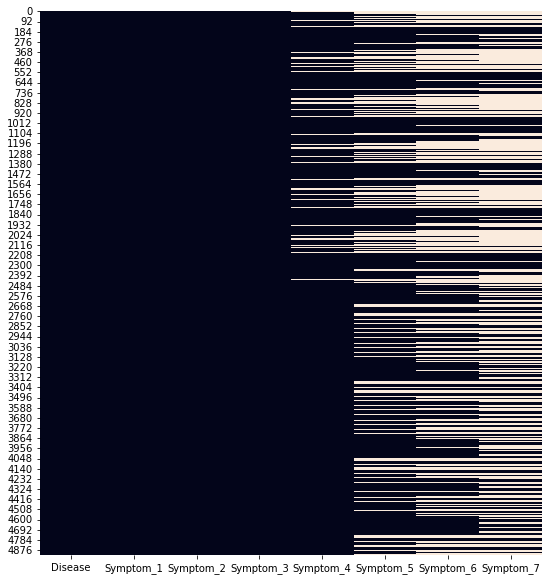

In [9]:
plt.figure(figsize=(9,10))
sns.heatmap(df.isnull(),cbar=False)

In [11]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7'],
      dtype='object')

In [13]:
df.describe().T

,count,unique,top,freq
Disease,4920,41,Fungal infection,120
Symptom_1,4920,34,vomiting,822
Symptom_2,4920,48,vomiting,870
Symptom_3,4920,54,fatigue,726
Symptom_4,4572,50,high_fever,378
Symptom_5,3714,38,headache,348
Symptom_6,2934,32,nausea,390
Symptom_7,2268,26,abdominal_pain,264


In [14]:
for col in df.columns:
    df[col]= df[col].str.replace('_',' ')
cols = df.columns

data = df[cols].values.flatten()

reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)

df = pd.DataFrame(reshaped, columns = df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN


In [15]:
df.fillna(0,inplace=True)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0


In [17]:
df.isna().sum()

Disease      0
Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
Symptom_5    0
Symptom_6    0
Symptom_7    0
dtype: int64

In [18]:
df["Disease"].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [19]:
df_s = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Disease%20Symptom%20Prediction/Symptom-severity.csv')
df_s.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [20]:
df_s['Symptom']=df_s['Symptom'].str.replace('_',' ')
df_s['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [21]:
a= np.array(df_s['weight'])
a

array([1, 3, 4, 4, 5, 3, 3, 5, 3, 4, 3, 5, 6, 6, 4, 3, 4, 5, 3, 3, 5, 2,
       6, 5, 4, 7, 3, 4, 3, 4, 5, 3, 3, 4, 5, 4, 4, 3, 4, 4, 6, 5, 4, 4,
       6, 6, 7, 6, 6, 5, 5, 4, 5, 4, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 4, 4,
       4, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 4, 3, 2, 2, 4, 5, 5, 6, 4, 4, 4,
       3, 4, 5, 6, 5, 4, 5, 3, 2, 2, 2, 3, 4, 6, 6, 4, 5, 4, 5, 4, 4, 3,
       3, 5, 2, 7, 6, 4, 5, 4, 5, 6, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 3,
       5])

In [22]:
vals = df.values
symptoms = df_s['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_s[df_s['Symptom'] == symptoms[i]]['weight'].values[0]
    
newdf = pd.DataFrame(vals, columns=cols)
newdf.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,dischromic patches,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0


In [23]:
newdf = newdf.replace('dischromic  patches', 0)
newdf = newdf.replace('spotting  urination',0)
newdf = newdf.replace('foul smell of urine',0)
newdf.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0
5,Fungal infection,3,4,0,0,0,0,0
6,Fungal infection,1,4,0,0,0,0,0
7,Fungal infection,1,3,0,0,0,0,0
8,Fungal infection,1,3,4,0,0,0,0
9,Fungal infection,1,3,4,0,0,0,0


In [24]:
X = newdf.drop(['Disease'],axis=1)
y = newdf['Disease']
X.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,1,3,4,0,0,0,0
1,3,4,0,0,0,0,0
2,1,4,0,0,0,0,0
3,1,3,0,0,0,0,0
4,1,3,4,0,0,0,0


In [25]:
y.sample(6)

1683                   Drug Reaction
280     Dimorphic hemmorhoids(piles)
255                     Tuberculosis
3935                        Impetigo
1207         Urinary tract infection
4743    Dimorphic hemmorhoids(piles)
Name: Disease, dtype: object

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=0)
clf_svc= SVC()
clf_svc.fit(X_train,y_train)

SVC()

In [27]:
predict = clf_svc.predict(X_test)
print('Accuracy Score: {}%'.format(round(accuracy_score(y_test,predict)*100,2)))

Accuracy Score: 95.43%


In [28]:
print(classification_report(y_test,predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       0.92      1.00      0.96        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       0.92      0.92      0.92        24
                                Allergy       0.83      1.00      0.91        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      0.96      0.98        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      0.88      0.93        24
                            Common Cold       1.00      0.88      0.93        24
                           

<AxesSubplot:>

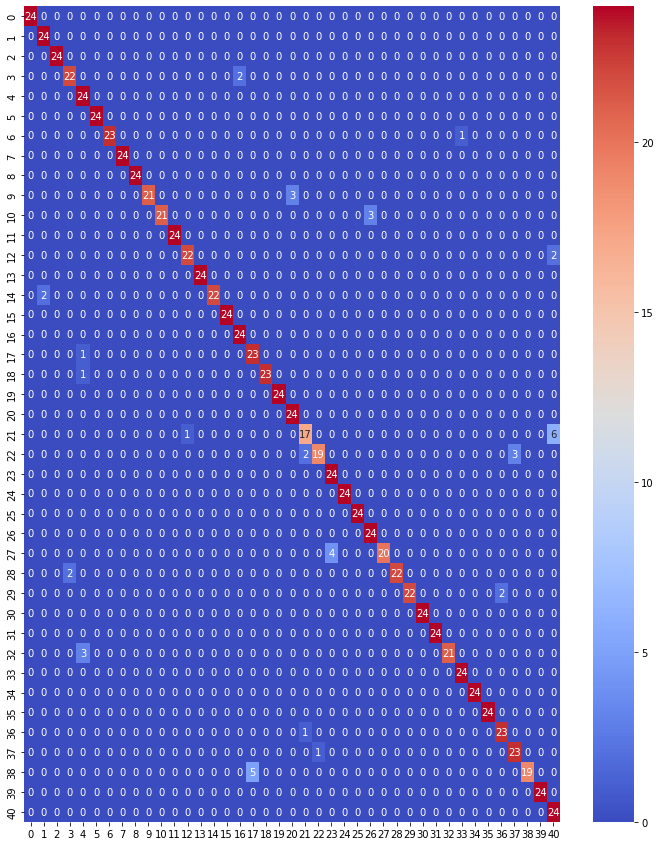

In [29]:
plt.figure(figsize=(12,15))
sns.heatmap(confusion_matrix(y_test,predict),annot=True,cbar=True,cmap='coolwarm')

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(n_estimators=700,random_state=0,n_jobs=-1,verbose=4)
clf_rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.2s


building tree 1 of 700building tree 2 of 700
building tree 3 of 700

building tree 4 of 700building tree 5 of 700
building tree 6 of 700building tree 7 of 700


building tree 8 of 700
building tree 9 of 700
building tree 10 of 700building tree 11 of 700building tree 12 of 700


building tree 13 of 700
building tree 14 of 700building tree 15 of 700
building tree 16 of 700

building tree 17 of 700building tree 18 of 700

building tree 19 of 700building tree 20 of 700building tree 21 of 700


building tree 22 of 700
building tree 23 of 700
building tree 24 of 700
building tree 25 of 700
building tree 26 of 700
building tree 27 of 700building tree 28 of 700building tree 29 of 700


building tree 30 of 700building tree 31 of 700

building tree 32 of 700
building tree 33 of 700
building tree 34 of 700building tree 35 of 700building tree 36 of 700building tree 37 of 700



building tree 38 of 700building tree 39 of 700

building tree 40 of 700
building tree 41 of 700
building tree 42 of 700bu

[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.5s


building tree 313 of 700
building tree 314 of 700building tree 315 of 700building tree 316 of 700


building tree 317 of 700
building tree 318 of 700building tree 319 of 700

building tree 320 of 700
building tree 321 of 700building tree 322 of 700
building tree 323 of 700
building tree 324 of 700

building tree 325 of 700
building tree 326 of 700
building tree 327 of 700
building tree 328 of 700
building tree 329 of 700
building tree 330 of 700building tree 331 of 700
building tree 332 of 700building tree 333 of 700
building tree 334 of 700building tree 335 of 700


building tree 336 of 700

building tree 337 of 700
building tree 338 of 700
building tree 339 of 700
building tree 340 of 700
building tree 341 of 700building tree 342 of 700

building tree 343 of 700
building tree 344 of 700
building tree 345 of 700
building tree 346 of 700
building tree 347 of 700
building tree 348 of 700
building tree 349 of 700building tree 350 of 700

building tree 351 of 700
building tree 352 of 700b

[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    0.8s



building tree 405 of 700

building tree 406 of 700
building tree 407 of 700
building tree 408 of 700building tree 409 of 700

building tree 410 of 700building tree 411 of 700building tree 412 of 700building tree 413 of 700



building tree 414 of 700
building tree 415 of 700
building tree 416 of 700
building tree 417 of 700building tree 418 of 700
building tree 419 of 700

building tree 420 of 700building tree 421 of 700
building tree 422 of 700

building tree 423 of 700
building tree 424 of 700building tree 425 of 700

building tree 426 of 700building tree 427 of 700

building tree 428 of 700
building tree 429 of 700building tree 430 of 700
building tree 431 of 700

building tree 432 of 700
building tree 433 of 700
building tree 434 of 700building tree 435 of 700

building tree 436 of 700building tree 437 of 700

building tree 438 of 700
building tree 439 of 700
building tree 440 of 700
building tree 441 of 700building tree 442 of 700

building tree 443 of 700building tree 444 of 700

[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:    1.3s


building tree 691 of 700
building tree 692 of 700building tree 693 of 700

building tree 694 of 700
building tree 695 of 700
building tree 696 of 700
building tree 697 of 700building tree 698 of 700

building tree 699 of 700
building tree 700 of 700


[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    1.5s finished


RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=0, verbose=4)

In [31]:
print('Accuracy Score: {}%'.format(round(accuracy_score(y_test,predict)*100,2)))

Accuracy Score: 95.43%


In [32]:
print(classification_report(y_test,predict))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       0.92      1.00      0.96        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       0.92      0.92      0.92        24
                                Allergy       0.83      1.00      0.91        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      0.96      0.98        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      0.88      0.93        24
                            Common Cold       1.00      0.88      0.93        24
                           

<AxesSubplot:>

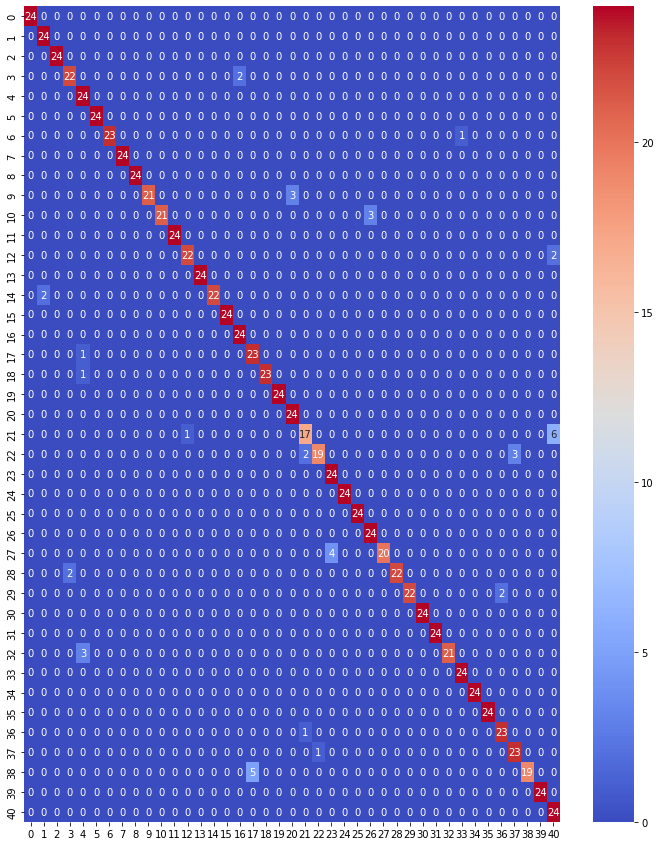

In [33]:
plt.figure(figsize=(12,15))
sns.heatmap(confusion_matrix(y_test,predict),annot=True,cbar=True,cmap='coolwarm')

In [34]:
def predict(s1,s2,s3,s4='vomiting',s5='vomiting',s6='vomiting',s7='vomiting'):
    l = [s1,s2,s3,s4,s5,s6,s7]
    print(l)
    
    x= np.array(df_s['Symptom'])
    y= np.array(df_s['weight'])
    for i in range(len(l)):
        for j in range(len(x)):
            if l[i]==x[j]:
                l[i]=y[j]
    res = [l]
    pred = clf_rfc.predict(res)
    print(pred[0])
predict('itching' ,'skin rash', 'nodal skin eruptions')

['itching', 'skin rash', 'nodal skin eruptions', 'vomiting', 'vomiting', 'vomiting', 'vomiting']
Chicken pox


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 597 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 700 out of 700 | elapsed:    0.1s finished
